In [23]:
def Get_Drag_Function () :

    # Drag coefficient data from flow simulations with states P = 98000 [Pa], T = 283 [K], density = rho = 1.15 [kg/m^2]
    # NOTE: data excludes that for 10 degrees
    sim_drag_coeffs = [       # DUNCAN ROCKS   :D
    [0, 0.4897130673,    0.4605084415,    0.4566277895,    0.457260162,     0.4577140061,    0.4570957994,    0.4566626055,    0.5642732454,    0.5680928992,    0.5717283138],
    [0, 0.5697580479,    0.4602782598,    0.456513712,     0.4567162609,    0.4569759963,    0.456424171,     0.455415689,     0.5583588651,    0.5620175824,    0.5649677736],
    [0, 0.5668725374,    0.4682819154,    0.4469762488,    0.4645024797,    0.4644837072,    0.4639810209,    0.4625354359,    0.556496065,     0.559965656,     0.562991906],
    [0, 0.5638586086,    0.4830633638,    0.4804639344,    0.481315034,     0.4815977549,    0.4822440287,    0.4804765347,    0.5557061413,    0.5589313185,    0.5619646087],
    [0, 0.5641773622,    0.4839314615,    0.4825487796,    0.4821114534,    0.4831116457,    0.4827254992,    0.4811014429,    0.5541560884,    0.5575369803,    0.5604568335],
    [0, 0.5690075644,    0.4846769576,    0.4816589436,    0.4822390455,    0.4827377599,    0.4830244712,    0.4806339902,    0.5587568886,    0.5619985844,    0.5647384353],
    [0, 0.5702164927,    0.4923129991,    0.4892673582,    0.4893980557,    0.4892061981,    0.4885889214,    0.4869239868,    0.5621926732,    0.5655911728,    0.5683652118],
    [0, 0.57425205,      0.5092990664,    0.5063569557,    0.5065504403,    0.5063751519,    0.5060755784,    0.5064538141,    0.5662279936,    0.5694119308,    0.5721914277],
    [0, 0.5792708916,    0.5054756846,    0.50307373,      0.5033542067,    0.5032704218,    0.5022323,       0.5047265086,    0.5713875199,    0.5744315084,    0.5768540181],
    [0, 0.5788864078,    0.5192401696,    0.5165947143,    0.5170544599,    0.5171723766,    0.5165778943,    0.5151439218,    0.5719901683,    0.5750984082,    0.5780046877]] 
    sim_drag_coeffs = array(sim_drag_coeffs, dtype='float64')

    sim_velocities = array([0, 20, 40,  60,  80,  100, 120, 140, 160, 180, 200])  # [m/s] simulation velocities
    # ADAS_deploy_array = array([0, 14.4, 21.6, 28.8, 36, 43.2, 50.4, 57.6, 64.8, 72])     # degrees of deployment for sim data
    sim_deploy_percents = delete(linspace(0, 1, 11), 1)       # simlation deployment percentages
    

    # Cross-sectional area [m^2] with fin deployment corresponding to angles in ADAS_deploy_array 
    sim_deploy_areas = [0.007127518874, 0.007256550874, 0.007411389274, 0.007566227674, 0.007695259674, 0.007811388474, 0.007914614074, 0.008017839674, 0.008095258874, 0.008185581274]
    # Convert areas from subscale to full scale (only thing that should change in this calc)
    sim_deploy_areas = array([x * 5.5/3.15 for x in sim_deploy_areas])    # convert to full scale
    
    print sim_drag_coeffs.shape
    print (sim_velocities**2).shape
    print sim_deploy_areas.shape
    print transpose(sim_drag_coeffs * sim_velocities**2).shape
    
    # Drag force = .5 * rho * A * v^2 * cd [N = kg*m/s^2]
    drag_force = 0.5 * 1.15 * transpose( transpose(sim_drag_coeffs * sim_velocities**2) * sim_deploy_areas )
    
    print(drag_force)

    return interp2d(sim_velocities, sim_deploy_percents, drag_force, kind='cubic') # or cubic -> what is O(A(%))?




In [21]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d


In [24]:
drag_function = Get_Drag_Function()
vel = linspace(20, 200, 200)
per = linspace(0, 72, 100)
PER, VEL = meshgrid(per, vel)
# DragF = drag_function(VEL, PER)
DragF = []
for p in per :
    DragF.append(drag_function(vel,p))
DragF = transpose(DragF)

(10, 11)
(11,)
(10,)
(11, 10)
[[   0.            1.40171603    5.27249206   11.76313809   20.94120635
    32.75311111   47.10077778   64.04863492  103.36839683  131.71120636
   163.64699998]
 [   0.            1.66035397    5.36525873   11.97309841   21.29495238
    33.29228572   47.88299999   65.03007936  104.13665079  132.66157143
   164.63944444]
 [   0.            1.68719397    5.57502698   11.97309841   22.12012699
    34.56130159   49.7144127    67.45601587  106.00385714  134.9975873
   167.56439681]
 [   0.            1.71328492    5.87115397   13.13901111   23.39961905
    36.58338095   52.7507619    71.53649206  108.06487302  137.56338094
   170.75300001]
 [   0.            1.74348778    5.98200952   13.42106508   23.83804762
    37.32422222   53.70392063   72.85107937  109.60120635  139.56031747
   173.19901588]
 [   0.            1.78495079    6.0816381    13.59847936   24.20419048
    37.85815873   54.54812698   73.87861905  112.17887301  142.80007936
   177.15587302]
 [   

(200, 100)
(200, 100)
(200, 100)


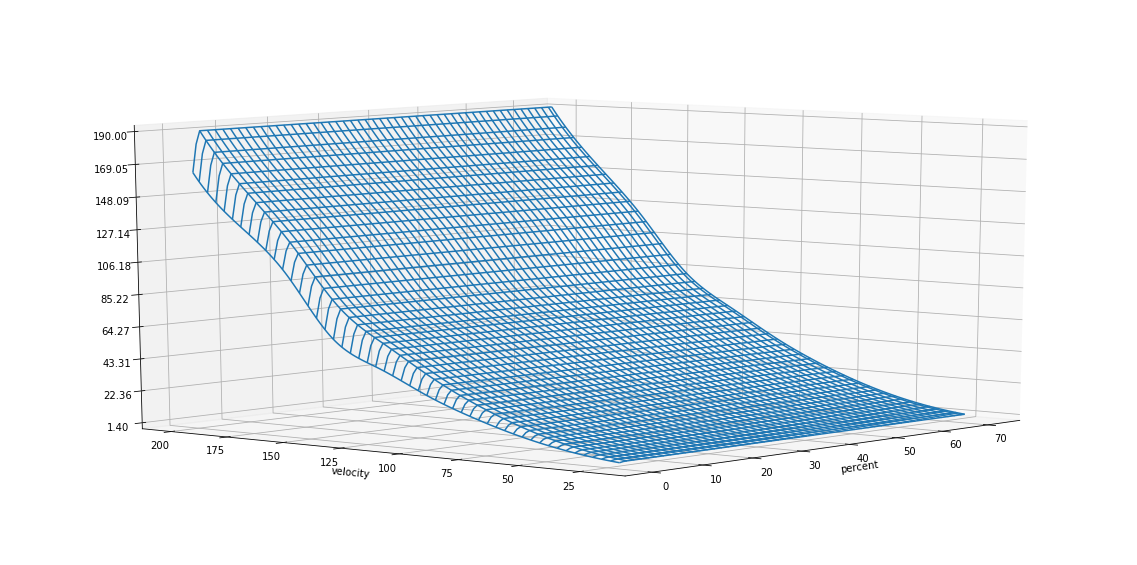

In [25]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

print(shape(PER))
print(shape(VEL))
print(shape(DragF))

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
# surf = ax.plot_surface(PER, VEL, DragF, rstride=1, cstride=1, cmap=cm.BuGn_r,linewidth=0, antialiased=False)
ax.plot_wireframe(PER,VEL,DragF)
plt.ylabel('velocity')
plt.xlabel('percent')


ax.zaxis.set_major_locator(LinearLocator(10))

ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.view_init(10,220)
plt.show()

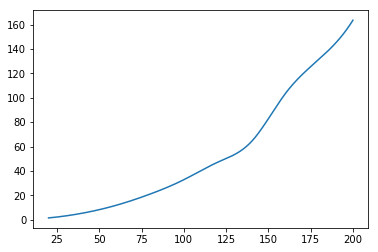

In [5]:
plt.plot(vel, DragF[:,0])
plt.show()